In [ ]:
!git clone https://github.com/SE-ABOSALIM/Brain-Tumor-Detection.git

Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 13392, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13392 (delta 3), reused 9 (delta 3), pack-reused 13381 (from 1)
Receiving objects: 100% (13392/13392), 312.16 MiB | 30.98 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (14059/14059), done.


In [ ]:
!dir Brain-Tumor-Detection

Brain_Tumor_Detection.ipynb  cnn_brain_tumor_model.h5  Main3.py  README.md
brain_tumor_detection.py     Dataset		       Main4.py  tensorflow.yaml
cleaned-Dataset		     Main2.py		       Main.py


In [ ]:
!dir /S "Brain-Tumor-Detection\Dataset"

Brain-Tumor-Detection/cleaned-Dataset/:
Testing  Training

Brain-Tumor-Detection/cleaned-Dataset/Testing:
glioma	meningioma  notumor  pituitary

Brain-Tumor-Detection/cleaned-Dataset/Testing/glioma:
Te-gl_0010.jpg	Te-gl_0060.jpg	Te-gl_0110.jpg	Te-gl_0160.jpg	Te-gl_0210.jpg	Te-gl_0260.jpg
Te-gl_0011.jpg	Te-gl_0061.jpg	Te-gl_0111.jpg	Te-gl_0161.jpg	Te-gl_0211.jpg	Te-gl_0261.jpg
Te-gl_0012.jpg	Te-gl_0062.jpg	Te-gl_0112.jpg	Te-gl_0162.jpg	Te-gl_0212.jpg	Te-gl_0262.jpg
Te-gl_0013.jpg	Te-gl_0063.jpg	Te-gl_0113.jpg	Te-gl_0163.jpg	Te-gl_0213.jpg	Te-gl_0263.jpg
Te-gl_0014.jpg	Te-gl_0064.jpg	Te-gl_0114.jpg	Te-gl_0164.jpg	Te-gl_0214.jpg	Te-gl_0264.jpg
Te-gl_0015.jpg	Te-gl_0065.jpg	Te-gl_0115.jpg	Te-gl_0165.jpg	Te-gl_0215.jpg	Te-gl_0265.jpg
Te-gl_0016.jpg	Te-gl_0066.jpg	Te-gl_0116.jpg	Te-gl_0166.jpg	Te-gl_0216.jpg	Te-gl_0266.jpg
Te-gl_0017.jpg	Te-gl_0067.jpg	Te-gl_0117.jpg	Te-gl_0167.jpg	Te-gl_0217.jpg	Te-gl_0267.jpg
Te-gl_0018.jpg	Te-gl_0068.jpg	Te-gl_0118.jpg	Te-gl_0168.jpg	Te-gl_0218.jpg	Te-gl_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
np.random.seed(0)

In [ ]:
dataset_path = "Brain-Tumor-Detection/Dataset"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
image_size = 150

In [ ]:
def process_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.bilateralFilter(img, 2, 50, 50)
    img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
    img = cv2.resize(img, (image_size, image_size))
    return img

In [ ]:
x_train, y_train, x_test, y_test = [], [], [], []

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
for label in labels:
    category_index = labels.index(label)

    train_folder = os.path.join(train_path, label)
    for file in tqdm(os.listdir(train_folder), desc=f"Training - {label}"):
        img = cv2.imread(os.path.join(train_folder, file), 0)
        img = cv2.bilateralFilter(img, 2, 50, 50)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        img = cv2.resize(img, (image_size, image_size))
        x_train.append(img)
        y_train.append(category_index)

    test_folder = os.path.join(test_path, label)
    for file in tqdm(os.listdir(test_folder), desc=f"Testing - {label}"):
        img = cv2.imread(os.path.join(test_folder, file), 0)
        img = cv2.bilateralFilter(img, 2, 50, 50)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        img = cv2.resize(img, (image_size, image_size))
        x_test.append(img)
        y_test.append(category_index)

Testing - pituitary: 100%|██████████| 300/300 [00:01<00:00, 294.73it/s]


In [ ]:
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
print(x_train.shape)
print(x_test.shape)

(4626, 150, 150, 3)
(572, 150, 150, 3)


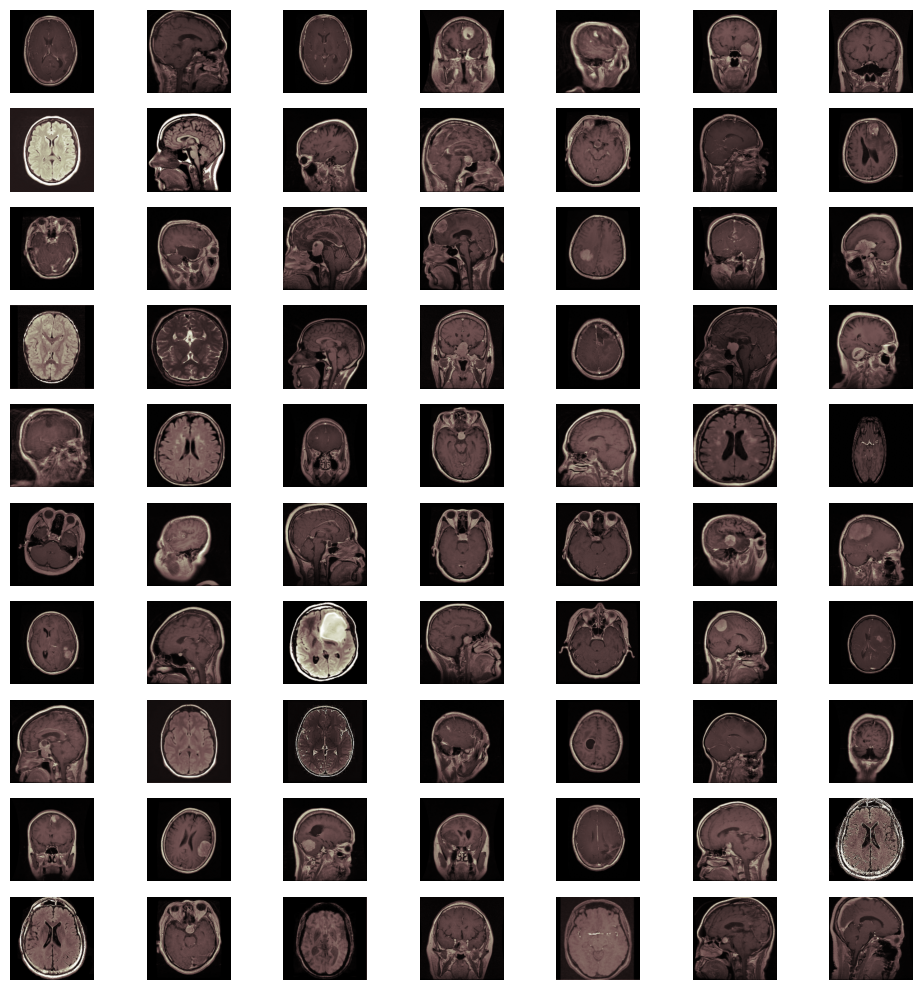

In [ ]:
fig, axes = plt.subplots(10, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.45))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 74, 74, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,654,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,863,492 (10.92 MB)

 Trainable params: 2,863,492 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)
datagen.fit(x_train)

In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=validation_generator,
    epochs=45,
    steps_per_epoch=len(x_train) // 32
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
 73/144 ━━━━━━━━━━━━━━━━━━━━ 28s 397ms/step - accuracy: 0.3284 - loss: 1.3086

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


144/144 ━━━━━━━━━━━━━━━━━━━━ 44s 238ms/step - accuracy: 0.3698 - loss: 1.2692 - val_accuracy: 0.5784 - val_loss: 1.0759
Epoch 2/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 65s 172ms/step - accuracy: 0.6434 - loss: 0.8874 - val_accuracy: 0.6819 - val_loss: 0.7643
Epoch 3/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.7432 - loss: 0.6453 - val_accuracy: 0.5110 - val_loss: 1.4064
Epoch 4/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.7667 - loss: 0.5866 - val_accuracy: 0.7572 - val_loss: 0.6045
Epoch 5/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.8031 - loss: 0.5118 - val_accuracy: 0.6170 - val_loss: 0.9503
Epoch 6/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.8354 - loss: 0.4465 - val_accuracy: 0.6407 - val_loss: 0.9996
Epoch 7/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.8301 - loss: 0.4547 - val_accuracy: 0.7765 - val_loss: 0.5776
Epoch 8/45
144/144 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.8427 - loss: 0.4048 - val

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
train_loss = score[0] * 100
train_accuracy = score[1] * 100

print(f"Training Loss: {train_loss:.2f}%")
print(f"Training Accuracy: {train_accuracy:.2f}%")

✅ Training Loss: 8.66%
✅ Training Accuracy: 97.10%


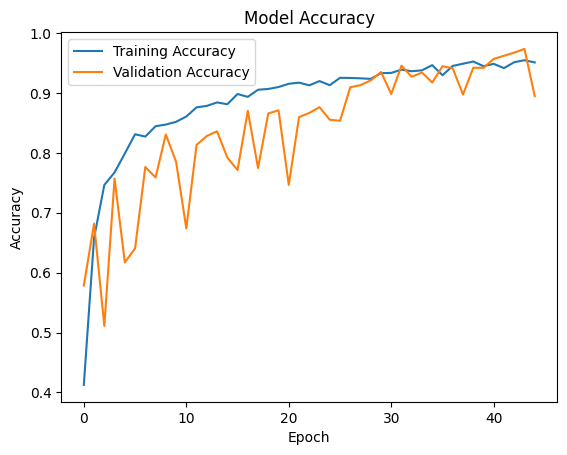

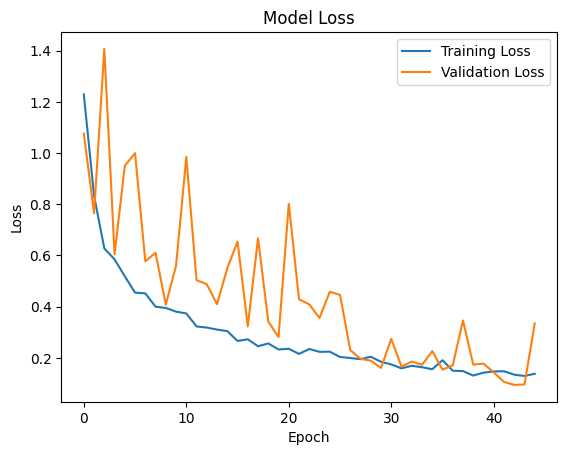

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
random_index = np.random.randint(0, len(x_test))
random_img = x_test[random_index]

random_img_resized = cv2.resize(random_img, (150, 150))

random_img_resized = random_img_resized / 255.0

In [ ]:
predictions = model.predict(random_img_resized.reshape(1, 150, 150, 3))
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Predicted label: notumor 
Actual label: meningioma 
Confidence: 98.02%



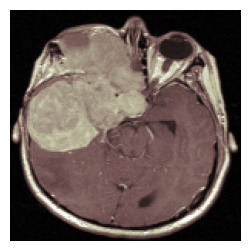

In [ ]:
actual_index = y_test[random_index]
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

print(f"Predicted label: {predicted_label} \nActual label: {actual_label} \nConfidence: {confidence*100:.2f}%\n")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted label: notumor 
Actual label: notumor 
Confidence: 97.07%



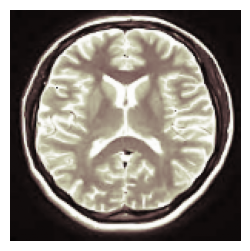

In [ ]:
random_index = np.random.randint(0, len(x_test))
random_img = x_test[random_index]

random_img_resized = cv2.resize(random_img, (150, 150))
random_img_resized = random_img_resized / 255.0

predictions = model.predict(random_img_resized.reshape(1, 150, 150, 3))
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

actual_index = np.argmax(y_test[random_index])
actual_label = labels[actual_index]

print(f"Predicted label: {predicted_label} \nActual label: {actual_label} \nConfidence: {confidence*100:.2f}%\n")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

In [ ]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test loss: 0.4395711421966553
Test accuracy: 0.8688024282455444


In [ ]:
score = model.evaluate(x_test, y_test)
test_loss = score[0] * 100
test_accuracy = score[1] * 100

print(f"Test Loss: {test_loss:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9709 - loss: 0.1317
Test Loss: 16.25%
Test Accuracy: 95.63%


In [ ]:
model.save("cnn_brain_tumor_model.h5")
print("Model saved as cnn_brain_tumor_model.h5")

NameError: name 'model' is not defined

📌 Modelin Beklediği Giriş Şekli: (None, 150, 150, 3)


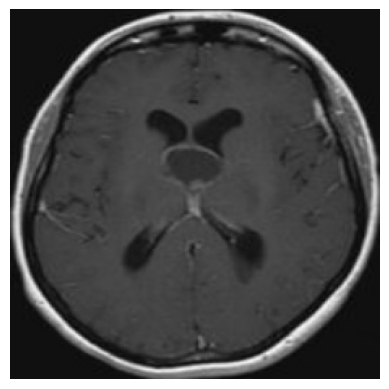

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
📌 Modelin Tahmini: notumor (Sınıf: 2)
✅ Güven Oranı: 87.51%


In [20]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.models import load_model

model = load_model("Brain-Tumor-Detection/cnn_brain_tumor_model.h5")

print("📌 Modelin Beklediği Giriş Şekli:", model.input_shape)

_, image_size, _, channels = model.input_shape

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

def process_image(image):
    if isinstance(image, np.ndarray):
        img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        raise ValueError("Beklenmeyen giriş formatı!")

    img = cv2.bilateralFilter(img, 2, 50, 50)
    img = cv2.resize(img, (image_size, image_size))

    if channels == 3:
        img = np.stack((img,)*3, axis=-1)

    return img

img_url = 'https://raw.githubusercontent.com/SE-ABOSALIM/Brain-Tumor-Detection/refs/heads/main/cleaned-Dataset/Testing/notumor/Te-no_0035.jpg'
response = requests.get(img_url, stream=True)

img = Image.open(response.raw)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = np.asarray(img)
img = process_image(img)

img = img.reshape(1, image_size, image_size, channels)
img = img.astype(np.float32) / 255.0

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_label = labels[predicted_class]
confidence = prediction[0][predicted_class]

print(f"Modelin Tahmini: {predicted_label} (Sınıf: {predicted_class})")
print(f"Güven Oranı: {confidence*100:.2f}%")
